In [1]:
import pandas as pd
transactionsdf = pd.read_excel('rawdata.xlsx', 'Transactions')
transactionsdf.head()


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


#  Inspecting column names and types

In [2]:
transactionsdf.columns


Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [3]:
print('Number of Rows', transactionsdf.shape[0])
print('Number of Columns', transactionsdf.shape[1])


Number of Rows 20000
Number of Columns 13


In [4]:
#columns data types
transactionsdf.dtypes


transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date           float64
dtype: object

In [5]:
#converting sold date time to correct date format
import datetime as dt
transactionsdf['product_first_sold_date'] = pd.TimedeltaIndex(
    transactionsdf['product_first_sold_date'], unit='d') + dt.datetime(1900, 1, 1)
transactionsdf['product_first_sold_date'].head()

#product first sold date column is corrupted


0   2012-12-04
1   2014-03-05
2   1999-07-22
3   1998-12-18
4   2015-08-12
Name: product_first_sold_date, dtype: datetime64[ns]

In [6]:
#checking the null values
import seaborn as sns
from matplotlib import pyplot as plt 
transactionsdf.isna().sum()



transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [7]:
nulldf = pd.DataFrame(data={'Column_Name': ['online_order', 'brand', 'product_line', 'product_class', 'product_size', 'standard_cost', 'product_first_sold_date'], 
                            'value': [360, 197, 197, 197, 197, 197, 197]})

nulldf

,Column_Name,value
0,online_order,360
1,brand,197
2,product_line,197
3,product_class,197
4,product_size,197
5,standard_cost,197
6,product_first_sold_date,197


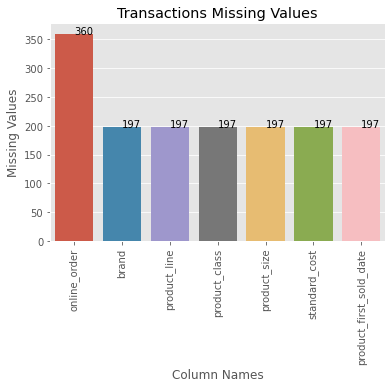

In [8]:
def addlabels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i])
plt.style.use('ggplot')
sns.barplot(data=nulldf, x='Column_Name', y = 'value')
addlabels(nulldf.Column_Name, nulldf.value)
plt.xticks(rotation=90)
plt.xlabel('Column Names')
plt.ylabel('Missing Values')
plt.title('Transactions Missing Values')
plt.show()


In [9]:
# we can see seven columns has missing values and number of missing values is very low, therefore missing values can be dropped


In [10]:
transactionsdf[['list_price', 'standard_cost']].describe().round(2)


,list_price,standard_cost
count,20000.00,19803.00
mean,1107.83,556.05
std,582.83,405.96
min,12.01,7.21
25%,575.27,215.14
50%,1163.89,507.58
75%,1635.30,795.10
max,2091.47,1759.85


In [11]:
#checking the duplicated values
transactionsdf.duplicated().sum()


0

In [12]:
print(transactionsdf['brand'].unique())
transactionsdf['brand'].value_counts()


['Solex' 'Trek Bicycles' 'OHM Cycles' 'Norco Bicycles' 'Giant Bicycles'
 'WeareA2B' nan]


Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

In [13]:
print(transactionsdf['product_line'].unique())
transactionsdf['product_line'].value_counts()


['Standard' 'Road' 'Mountain' 'Touring' nan]


Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [14]:
print(transactionsdf['product_class'].unique())
transactionsdf['product_class'].value_counts()


['medium' 'low' 'high' nan]


medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [15]:
print(transactionsdf['product_size'].unique())
transactionsdf['product_size'].value_counts()


['medium' 'large' 'small' nan]


medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

In [16]:
ncldf = pd.read_excel('rawdata.xlsx', 'NewCustomerList')
ncldf.head()


/var/folders/25/53b25p9j7k52dz70pl14gl2w0000gn/T/ipykernel_1874/4154167218.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  ncldf = pd.read_excel('rawdata.xlsx', 'NewCustomerList')


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,1.01,1.2625,1.578125,1.341406,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.70,0.7000,0.875000,0.743750,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.67,0.6700,0.670000,0.670000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.96,1.2000,1.200000,1.200000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.73,0.7300,0.912500,0.912500,4,4,1.703125


In [17]:
ncldf.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value'],
      dtype='object')

In [18]:
#dropping the unnamed columns
ncldf.drop(['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
           'Unnamed: 19', 'Unnamed: 20'], axis=1, inplace=True)


In [19]:
ncldf.dtypes


first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
owns_car                                       object
tenure                                          int64
address                                        object
postcode                                        int64
state                                          object
country                                        object
property_valuation                              int64
Rank                                            int64
Value                                         float64
dtype: object

In [20]:
#checking missing values
ncldf.isna().sum()


first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

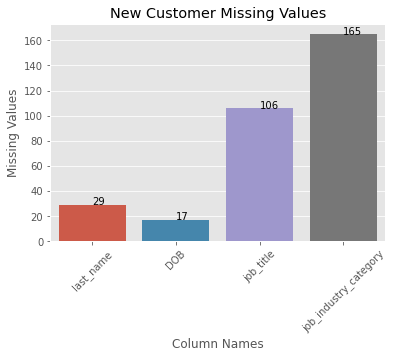

In [21]:
nullncl = pd.DataFrame(data={'Column_Name': ['last_name', 'DOB', 'job_title', 'job_industry_category'],
                            'value': [29, 17, 106, 165]})

nullncl
sns.barplot(data =nullncl, x='Column_Name', y='value')
addlabels(nullncl.Column_Name, nullncl.value)
plt.xticks(rotation=45)
plt.xlabel('Column Names')
plt.ylabel('Missing Values')
plt.title('New Customer Missing Values')
plt.show()


In [22]:
ncldf.duplicated().sum()

0

In [23]:
ncldf.groupby('gender')['gender'].agg('count')


gender
Female    513
Male      470
U          17
Name: gender, dtype: int64

In [24]:
cusdemodf = pd.read_excel('rawdata.xlsx', 'CustomerDemographic')
cusdemodf.head()


/var/folders/25/53b25p9j7k52dz70pl14gl2w0000gn/T/ipykernel_1874/1872845277.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  cusdemodf = pd.read_excel('rawdata.xlsx', 'CustomerDemographic')


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [25]:
cusdemodf.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

In [26]:
#dropping the default column as it make no sense
cusdemodf.drop(['default'], axis=1, inplace=True)

In [27]:
#checking null values
cusdemodf.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

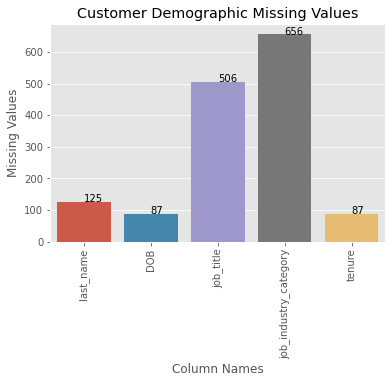

In [28]:
nullcusdem = pd.DataFrame(data={'Column_Name': ['last_name', 'DOB', 'job_title', 'job_industry_category', 'tenure'],
                             'value': [125, 87, 506, 656, 87]})

nullcusdem
sns.barplot(data=nullcusdem, x='Column_Name', y='value')
addlabels(nullcusdem.Column_Name, nullcusdem.value)
plt.xticks(rotation=90)
plt.xlabel('Column Names')
plt.ylabel('Missing Values')
plt.title('Customer Demographic Missing Values')
plt.show()


In [29]:
#checking duplicate values
cusdemodf.duplicated().sum()

0

In [30]:
cusdemodf.groupby('gender')['gender'].agg('count')


gender
F            1
Femal        1
Female    2037
M            1
Male      1872
U           88
Name: gender, dtype: int64

In [31]:
#replacing the errror names
genderDict = {'F': 'Female', 'Femal': 'Female', 'M': 'Male', 'U': 'U'}
cusdemodf['gender'] = cusdemodf['gender'].replace(genderDict)

In [32]:
cusadddf = pd.read_excel('rawdata.xlsx', 'CustomerAddress')
cusadddf.head()


,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [33]:
cusadddf.isna().sum()


customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [34]:
cusadddf.duplicated().sum()


0

In [35]:
#Merging customer address dataframe with customer demographic dataframe
df1 = pd.merge(cusdemodf, cusadddf, how='left', on='customer_id')
df1.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,New South Wales,Australia,10.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153.0,New South Wales,Australia,10.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,0 Holy Cross Court,4211.0,QLD,Australia,9.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,17979 Del Mar Point,2448.0,New South Wales,Australia,4.0


In [36]:
totalrecorddf = pd.DataFrame(data={'column_name': ['transaction', 'customer_demographic'], 'total_record': [len(transactionsdf), len(cusdemodf)]})
totalrecorddf

,column_name,total_record
0,transaction,20000
1,customer_demographic,4000


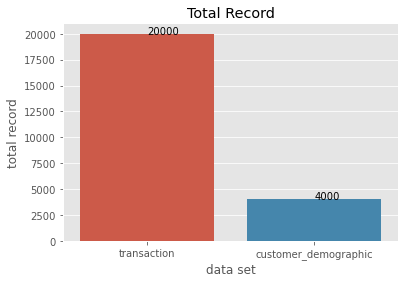

In [37]:
sns.barplot(data=totalrecorddf, x='column_name', y='total_record')
addlabels(totalrecorddf.column_name, totalrecorddf.total_record)
plt.xlabel('data set')
plt.ylabel('total record')
plt.title('Total Record')
plt.show()
